In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
# import usage
usage = pd.read_feather('bixi_usage_2023_cleaned.feather')
stations = pd.read_feather('stations_2023_altitude.feather')

In [3]:
stations.head()

,name,latitude,longitude,arrondissement,altitude_m
station_id,,,,,
1,Métro Mont-Royal (Utilités publiques / Rivard),45.5242361,-73.5815522,Le Plateau-Mont-Royal,48.31
2,Rielle / Wellington,45.4601559,-73.5670012,Verdun,14.77
3,Ste-Catherine / Drummond,45.4985885,-73.5742781,Ville-Marie,39.33
709,Drummond / Ste-Catherine,45.498639,-73.574227,Ville-Marie,39.33
4,Boyer / du Mont-Royal,45.527432,-73.579917,Le Plateau-Mont-Royal,47.48


In [4]:
# filter unknown pickup or dropoff
usage = usage[(usage['end_station_id'] != -1) &
        (usage['start_station_id'] != -1)]

In [5]:
df = usage.merge(stations['altitude_m'].rename('altitude_m_start'), how='left', left_on='end_station_id', right_index=True)
df = df.merge(stations['altitude_m'].rename('altitude_m_end'), how='left', left_on='start_station_id', right_index=True)

In [7]:
df.head()

,start_station_id,end_station_id,duration_s,start_timestamp,end_timestamp,hour,altitude_m_start,altitude_m_end
0,1,306,396.00,2023-10-25 16:44:56.468000-04:00,2023-10-25 16:51:32.113000-04:00,16,46.44,48.31
1,2,215,1432.00,2023-10-25 17:48:55.502000-04:00,2023-10-25 18:12:47.951000-04:00,17,16.45,14.77
2,3,287,286.00,2023-10-25 22:01:45.974000-04:00,2023-10-25 22:06:32.418000-04:00,22,13.22,39.33
3,4,269,324.00,2023-10-25 17:31:29.932000-04:00,2023-10-25 17:36:54.383000-04:00,17,54.62,47.48
4,5,514,434.00,2023-10-25 17:40:06.571000-04:00,2023-10-25 17:47:20.298000-04:00,17,26.16,26.36


In [8]:
df['altitude_diff'] = df['altitude_m_start'] - df['altitude_m_end']
df = df.dropna(subset=['altitude_diff'])

In [9]:
df.head()

,start_station_id,end_station_id,duration_s,start_timestamp,end_timestamp,hour,altitude_m_start,altitude_m_end,altitude_diff
0,1,306,396.00,2023-10-25 16:44:56.468000-04:00,2023-10-25 16:51:32.113000-04:00,16,46.44,48.31,-1.87
1,2,215,1432.00,2023-10-25 17:48:55.502000-04:00,2023-10-25 18:12:47.951000-04:00,17,16.45,14.77,1.68
2,3,287,286.00,2023-10-25 22:01:45.974000-04:00,2023-10-25 22:06:32.418000-04:00,22,13.22,39.33,-26.11
3,4,269,324.00,2023-10-25 17:31:29.932000-04:00,2023-10-25 17:36:54.383000-04:00,17,54.62,47.48,7.14
4,5,514,434.00,2023-10-25 17:40:06.571000-04:00,2023-10-25 17:47:20.298000-04:00,17,26.16,26.36,-0.20


In [10]:
df['altitude_diff'].describe()

count   10991109.00
mean          -2.19
std           17.44
min         -103.24
25%          -10.02
50%           -0.54
75%            5.64
max          103.24
Name: altitude_diff, dtype: float64

<Axes: >

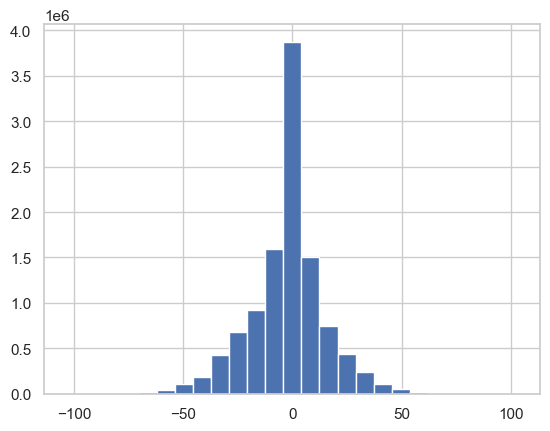

In [11]:
df['altitude_diff'].hist(bins=25)

In [36]:
df.sort_values(by=['altitude_diff'])[:25]

,start_station_id,end_station_id,duration_s,start_timestamp,end_timestamp,hour,altitude_m_start,altitude_m_end,altitude_diff
6337120,462,164,1882.00,2023-06-20 17:30:25.487000-04:00,2023-06-20 18:01:47.625000-04:00,17,12.44,115.68,-103.24
4706294,462,164,1433.00,2023-07-20 10:05:44.486000-04:00,2023-07-20 10:29:37.448000-04:00,10,12.44,115.68,-103.24
9271311,462,164,919.00,2023-08-04 13:02:59.776000-04:00,2023-08-04 13:18:19.076000-04:00,13,12.44,115.68,-103.24
2773064,462,164,1679.00,2023-06-15 09:51:20.884000-04:00,2023-06-15 10:19:19.560000-04:00,9,12.44,115.68,-103.24
6618218,462,164,1814.00,2023-08-20 15:58:01.446000-04:00,2023-08-20 16:28:15.660000-04:00,15,12.44,115.68,-103.24
4484233,462,164,1479.00,2023-05-25 15:30:26.881000-04:00,2023-05-25 15:55:05.538000-04:00,15,12.44,115.68,-103.24
6337815,462,164,1568.00,2023-06-20 17:35:40.420000-04:00,2023-06-20 18:01:48.049000-04:00,17,12.44,115.68,-103.24
7941526,462,164,1836.00,2023-08-20 15:57:40.233000-04:00,2023-08-20 16:28:16.405000-04:00,15,12.44,115.68,-103.24
11589416,462,164,1648.00,2023-05-31 10:01:46.475000-04:00,2023-05-31 10:29:14.249000-04:00,10,12.44,115.68,-103.24
169080,462,164,2181.00,2023-05-27 12:50:51.445000-04:00,2023-05-27 13:27:12.518000-04:00,12,12.44,115.68,-103.24


In [33]:
print(stations.loc[462])
print(stations.loc[113])

name              Métro Édouard-Montpetit (du Mont-Royal / Vince...
latitude                                                  45.510086
longitude                                                -73.611429
arrondissement                                            Outremont
altitude_m                                                   115.68
Name: 462, dtype: object
name              Casino de Montréal
latitude                   45.506373
longitude                 -73.524577
arrondissement           Ville-Marie
altitude_m                     13.19
Name: 113, dtype: object


In [11]:
df = pd.read_feather('bixi_usage_2023_cleaned.feather')
time_df = df[['start_timestamp','start_station_id']]

#removing unknown pickup stations
time_df = time_df[time_df['start_station_id'] != -1]

In [12]:
# Which months are busiers
monthly = time_df.resample('1ME', on='start_timestamp').count().reset_index()
monthly['month'] = monthly['start_timestamp'].dt.month_name()
monthly_stats = monthly.drop(['start_timestamp'], axis=1)
monthly_stats.columns = ['count', 'month']

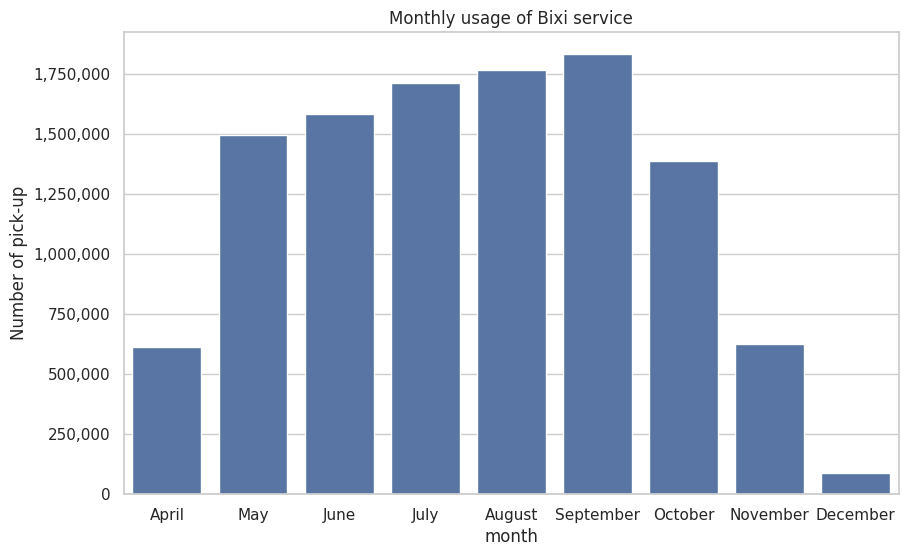

In [13]:
fig, ax = plt.subplots(figsize=[10,6])
sns.barplot(data=monthly_stats, y='count', x='month')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Monthly usage of Bixi service')
plt.xlabel('month')
plt.ylabel('Number of pick-up')
plt.show()

In [16]:
# Distribution by day of the week
dotw_df = df.copy()
dotw_df['dotw'] = dotw_df['start_timestamp'].dt.weekday
dotw_df['day_name'] = dotw_df['start_timestamp'].dt.day_name()
dotw = dotw_df[['dotw','day_name','start_station_id']].groupby(['dotw','day_name']).count()
dotw.columns = ['count']

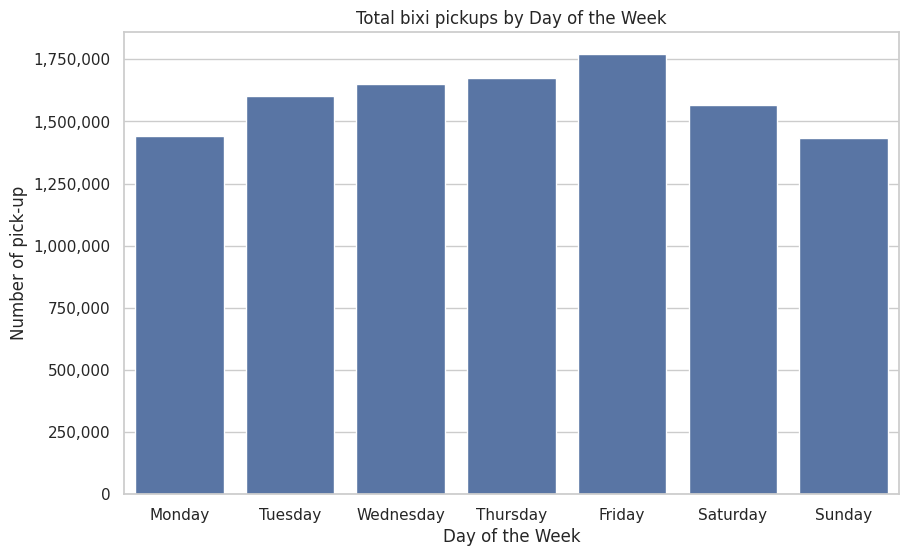

In [17]:
fig, ax = plt.subplots(figsize=[10,6])
sns.barplot(data=dotw, x='day_name', y='count')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title('Total bixi pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of pick-up')
plt.show()

In [18]:
hour_df = df.copy()
hour_df['dotw'] = hour_df['start_timestamp'].dt.hour
hourly = df[['hour','start_station_id']].groupby('hour').count()
hourly.columns = ['count']

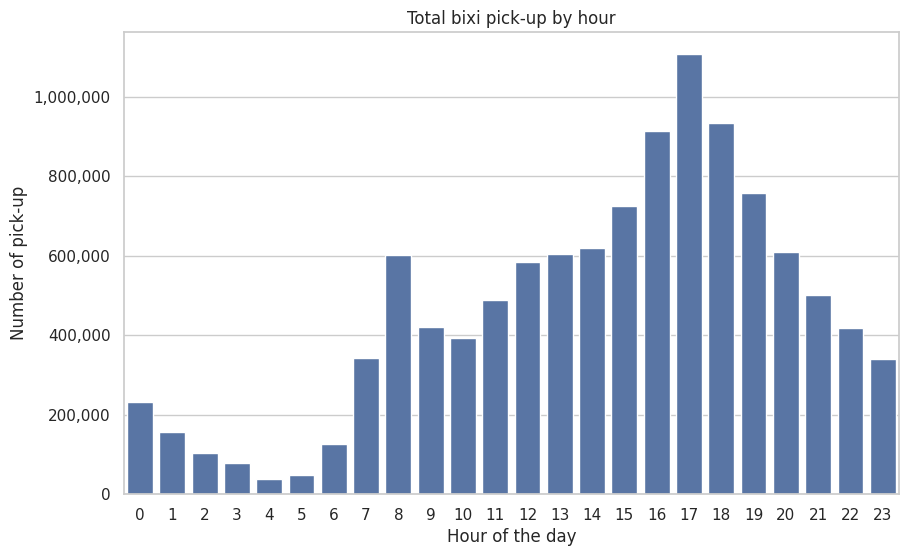

In [20]:
fig, ax = plt.subplots(figsize=[10,6])
sns.barplot(data=hourly, y='count', x='hour')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.title('Total bixi pick-up by hour')
plt.xlabel('Hour of the day')
plt.ylabel('Number of pick-up')

plt.show()